<a href="https://colab.research.google.com/github/841532/google_colab/blob/main/lab3_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа № 3

## Задание
Решите пожалуйста следующую задачу.

1. Примените методы снижения размерности (до двумерного представления
n_components=2) перечисленные ниже для данных находящихся пo
[ссылке](https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view). Здесь - метка (учитель) является столбец / атрибут - `outcome`. Предоставьте результаты, используя следующие ядерные функции:
- PCA
- LDA
- TruncatedSVD
- Kernel PCA (перебрав все ядерные функции - ('linear', 'poly', 'rbf', sigmoid',
'cosine', 'precomputed')

## Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! gdown --fuzzy 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view'

Downloading...
From: https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 51.1MB/s]


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##  О датасете
[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)

Этот набор данных взят из Национального института диабета, заболеваний органов пищеварения и почек (NIDDK). Целью набора данных является диагностическое предсказание наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года, родом из индейцев Пима.

Наборы данных состоят из нескольких переменных медицинских предикторов и одной целевой переменной `Outcome`. Переменные-предикторы включают количество беременностей, которые были у пациентки, её индекс массы тела `BMI`, уровень инсулина, возраст и так далее. Всего в датасете 9 переменных:
- `Pregnancies` - количество беременностей;
- `Glucose` - концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе;
- `BloodPressure` - диастолическое артериальное давление (мм рт. ст.);
- `SkinThickness` - толщина кожной складки трицепса (мм);
- `Insulin` - 2-часовой сывороточный инсулин (мкЕд/мл);
- `BMI` - Индекс массы тела (вес в кг/(рост в м)^2);
- `DiabetesPedigreeFunction` - функция оценки вероятности диабета на основе семейного анамнеза;
- `Age` - возраст (лет);
- `Outcome` - целевая переменная (0 или 1) 268 из 768 — 1 (больны), остальные — 0 (здоровы).



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Метод PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# подготовка данных
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# создание dataframe для визуализации
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Outcome'] = y.values

# визуализация результата
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Outcome', data=df_pca, palette='viridis')
plt.title('PCA: 2D Projection of Diabetes Dataset (2026 Analysis)')
plt.grid(True)
plt.show()

# вывод процента объясненной дисперсии
print(f"Объясненная дисперсия (Explained Variance): {pca.explained_variance_ratio_}")
print(f"Суммарная дисперсия: {pca.explained_variance_ratio_.sum():.2%}")

## Метод LDA

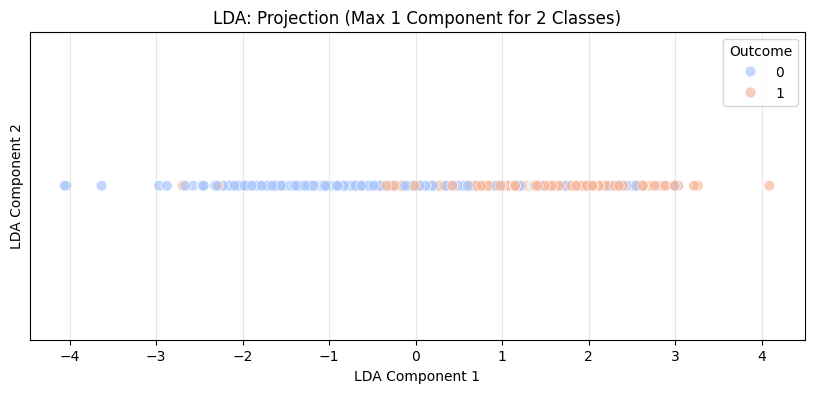

Объясненная дисперсия LDA: 1.0000


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# подготовка данных
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# применение LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# визуализация
df_lda = pd.DataFrame(data=X_lda, columns=['LDA Component 1'])
df_lda['LDA Component 2'] = 0
df_lda['Outcome'] = y.values

plt.figure(figsize=(10, 4))
sns.scatterplot(x='LDA Component 1', y='LDA Component 2', hue='Outcome',
                data=df_lda, palette='coolwarm', alpha=0.7, s=60)
plt.title('LDA: Projection (Max 1 Component for 2 Classes)')
plt.yticks([])
plt.grid(True, alpha=0.3)
plt.show()

print(f"Объясненная дисперсия LDA: {lda.explained_variance_ratio_[0]:.4f}")

## Метод TruncatedSVD

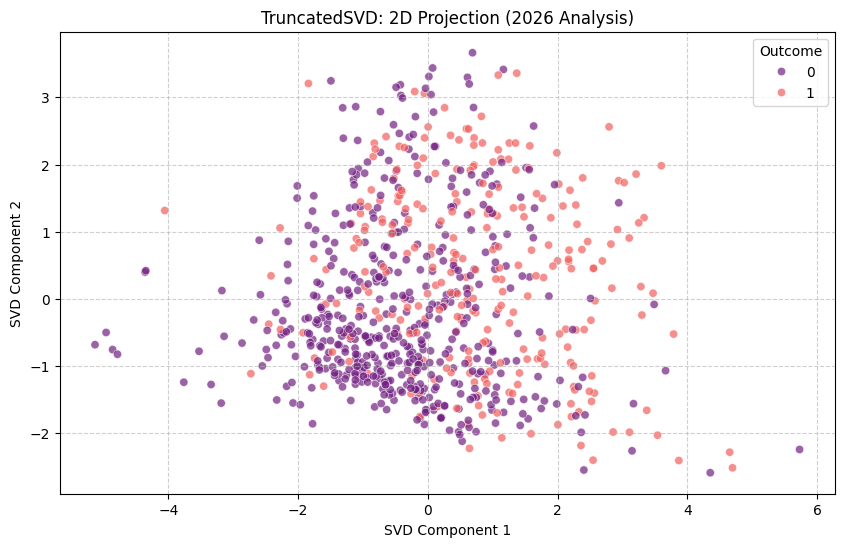

Объясненная дисперсия (Explained Variance): [0.26179749 0.21640127]
Суммарная дисперсия: 47.82%


In [ ]:
from sklearn.decomposition import TruncatedSVD

# применение TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_scaled) # использование отмасштабированных данных

# создание dataframe для визуализации
df_svd = pd.DataFrame(data=X_svd, columns=['SVD Component 1', 'SVD Component 2'])
df_svd['Outcome'] = y.values

# визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SVD Component 1', y='SVD Component 2', hue='Outcome',
                data=df_svd, palette='magma', alpha=0.7)
plt.title('TruncatedSVD: 2D Projection (2026 Analysis)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# вывод дисперсии
print(f"Объясненная дисперсия (Explained Variance): {svd.explained_variance_ratio_}")
print(f"Суммарная дисперсия: {svd.explained_variance_ratio_.sum():.2%}")

## Метод Kernel PCA

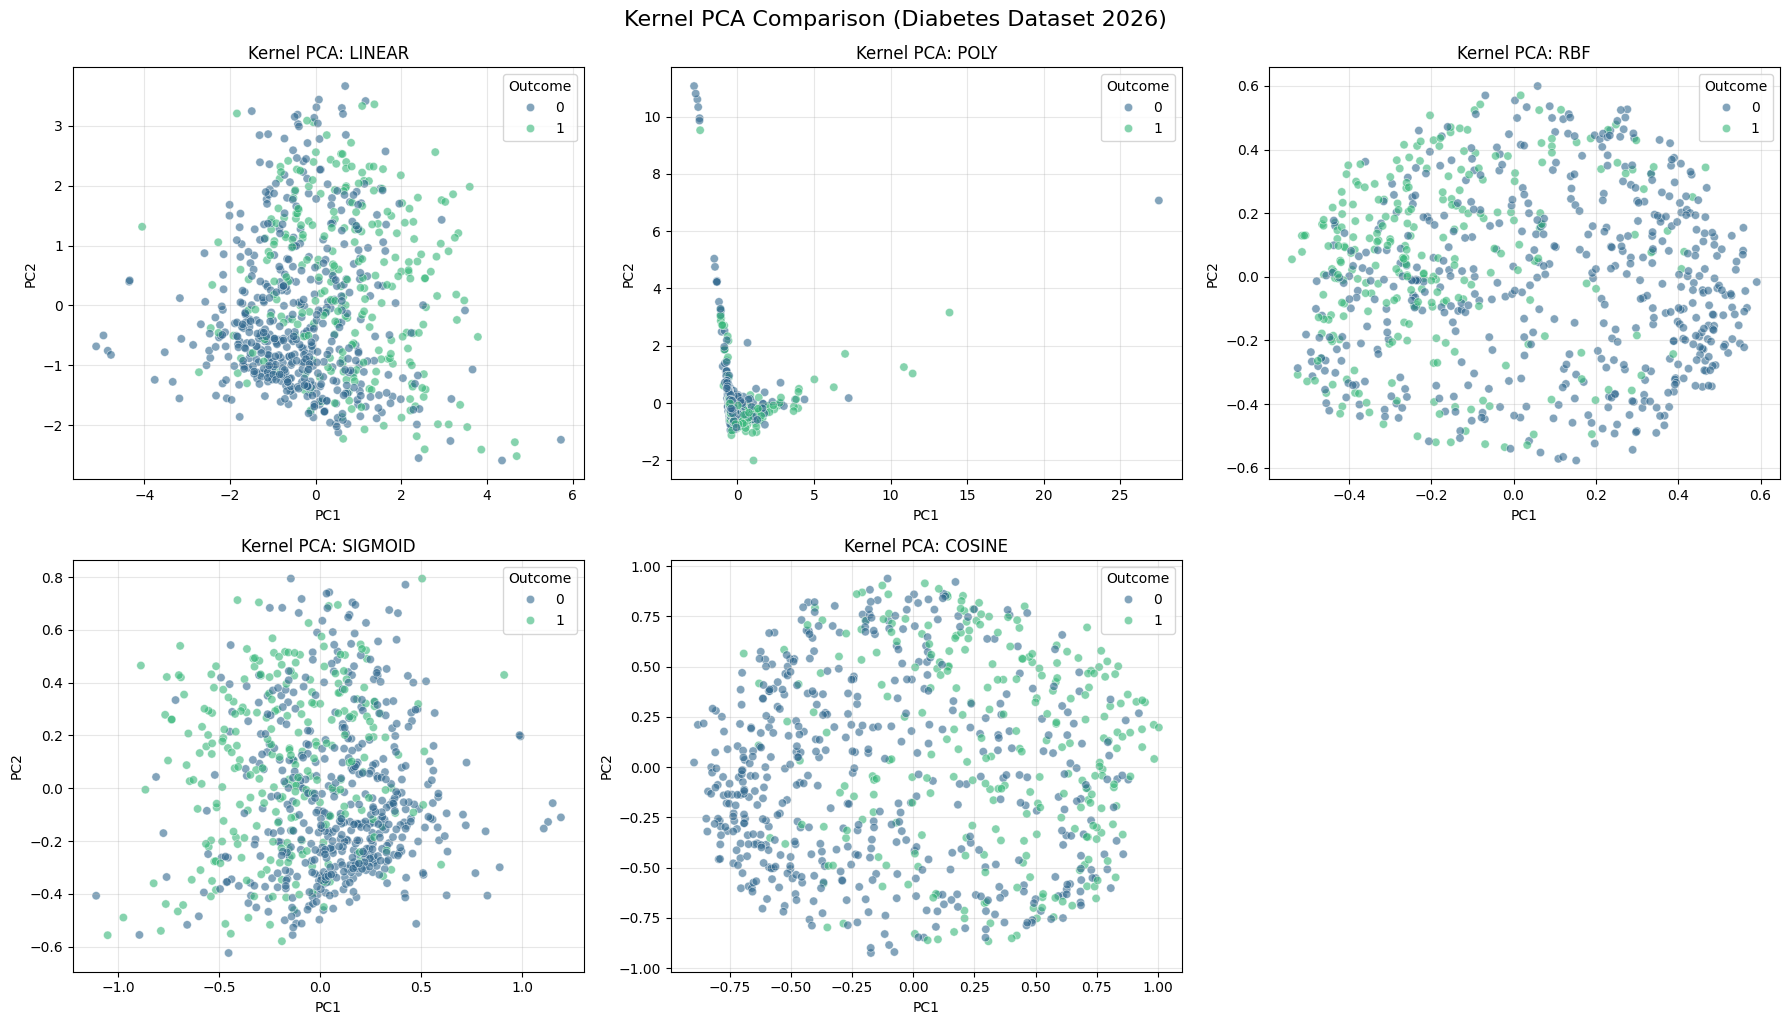

In [ ]:
from sklearn.decomposition import KernelPCA

# список ядер из задания
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']

# настройка сетки графиков (2 ряда, 3 колонки)
plt.figure(figsize=(18, 10))

for i, kernel in enumerate(kernels, 1):
    # применение Kernel PCA
    kpca = KernelPCA(n_components=2, kernel=kernel, random_state=42)
    X_kpca = kpca.fit_transform(X_scaled)

    # создание dataframe
    df_kpca = pd.DataFrame(data=X_kpca, columns=['PC1', 'PC2'])
    df_kpca['Outcome'] = y.values

    # подграфик
    plt.subplot(2, 3, i)
    sns.scatterplot(x='PC1', y='PC2', hue='Outcome', data=df_kpca, palette='viridis', alpha=0.6)
    plt.title(f'Kernel PCA: {kernel.upper()}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Kernel PCA Comparison (Diabetes Dataset 2026)', fontsize=16, y=1.02)
plt.show()

###  Ядерная функция `linear`

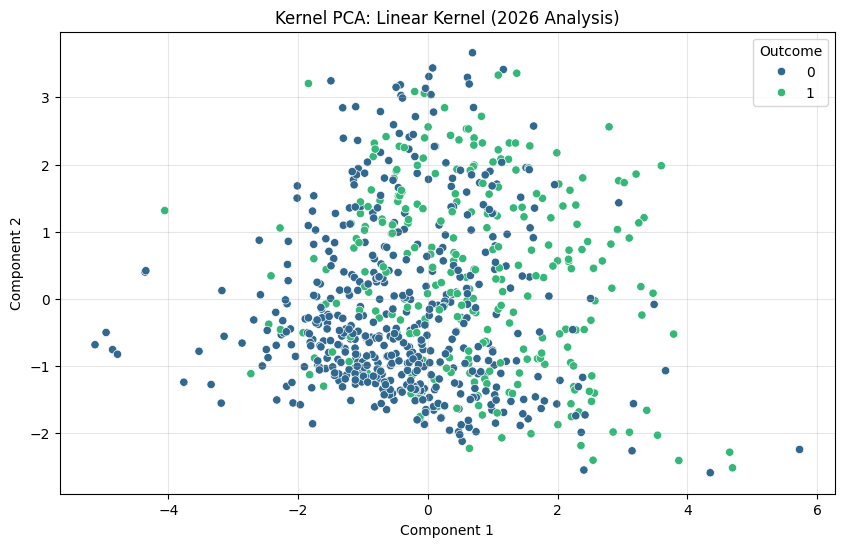

Kernel PCA (linear) успешно выполнен.


In [ ]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# применение Kernel PCA с линейным ядром
kpca_linear = KernelPCA(n_components=2, kernel='linear')
X_kpca_linear = kpca_linear.fit_transform(X_scaled)

# создание dataframe для визуализации
df_linear = pd.DataFrame(data=X_kpca_linear, columns=['Component 1', 'Component 2'])
df_linear['Outcome'] = y.values

# визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='Outcome', data=df_linear, palette='viridis')
plt.title('Kernel PCA: Linear Kernel (2026 Analysis)')
plt.grid(True, alpha=0.3)
plt.show()

print("Kernel PCA (linear) успешно выполнен.")

###  Ядерная функция `poly`

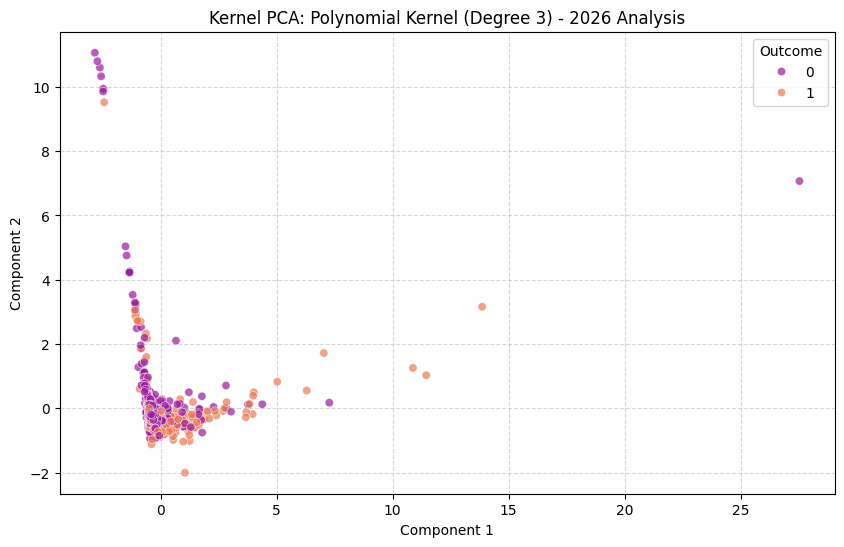

Kernel PCA (poly) успешно применен.


In [ ]:
from sklearn.decomposition import KernelPCA

# применение Kernel PCA с ядром poly
# по умолчанию степень полинома равна 3
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=3, gamma=None, random_state=42)
X_kpca_poly = kpca_poly.fit_transform(X_scaled)

# создание dataframe для визуализации
df_poly = pd.DataFrame(data=X_kpca_poly, columns=['Component 1', 'Component 2'])
df_poly['Outcome'] = y.values

# визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='Outcome', data=df_poly, palette='plasma', alpha=0.7)
plt.title('Kernel PCA: Polynomial Kernel (Degree 3) - 2026 Analysis')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("Kernel PCA (poly) успешно применен.")

###  Ядерная функция `rbf`

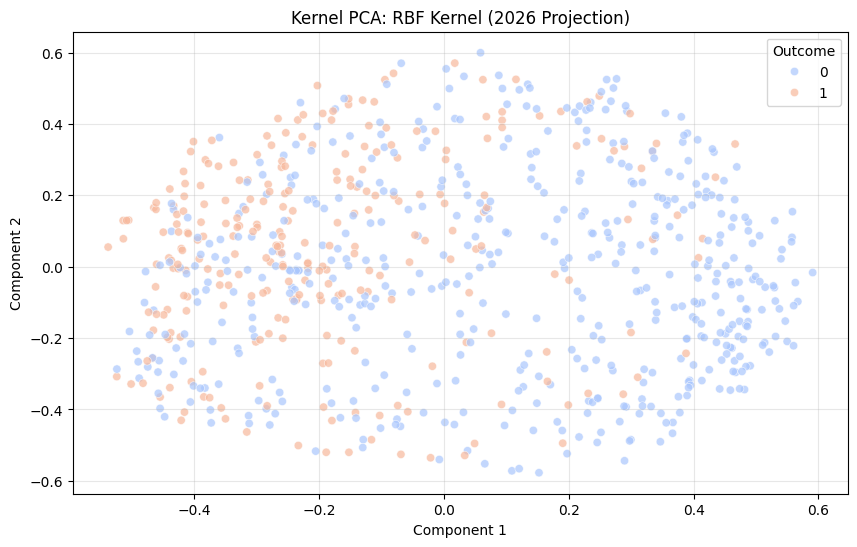

Kernel PCA (rbf) успешно выполнен.


In [ ]:
from sklearn.decomposition import KernelPCA

# применение Kernel PCA с ядром rbf
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=None, random_state=42)
X_kpca_rbf = kpca_rbf.fit_transform(X_scaled)

# создание dataframe для визуализации
df_rbf = pd.DataFrame(data=X_kpca_rbf, columns=['Component 1', 'Component 2'])
df_rbf['Outcome'] = y.values

# визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='Outcome', data=df_rbf, palette='coolwarm', alpha=0.7)
plt.title('Kernel PCA: RBF Kernel (2026 Projection)')
plt.grid(True, alpha=0.3)
plt.show()

print("Kernel PCA (rbf) успешно выполнен.")

###  Ядерная функция `sigmoid`

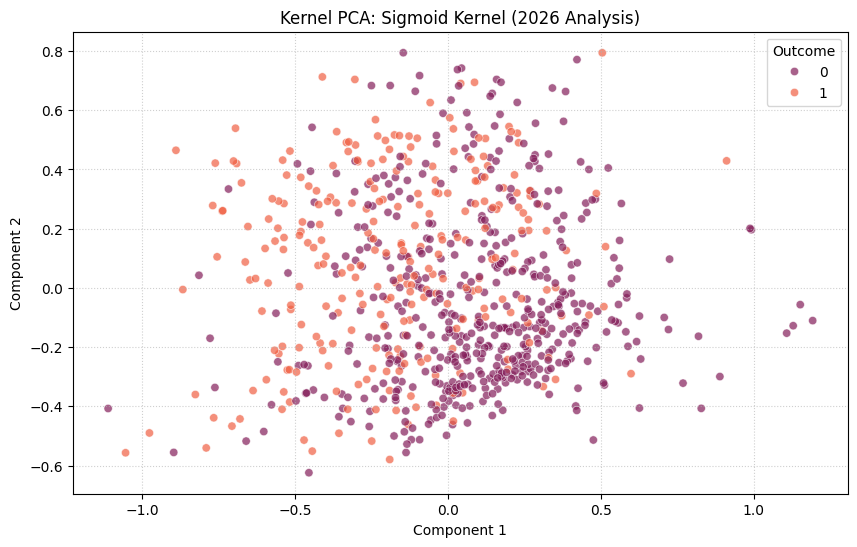

Kernel PCA (sigmoid) успешно выполнен.


In [ ]:
from sklearn.decomposition import KernelPCA

# применение Kernel PCA с ядром sigmoid
kpca_sigmoid = KernelPCA(n_components=2, kernel='sigmoid', gamma=None, random_state=42)
X_kpca_sigmoid = kpca_sigmoid.fit_transform(X_scaled)

# создание dataframe для визуализации
df_sigmoid = pd.DataFrame(data=X_kpca_sigmoid, columns=['Component 1', 'Component 2'])
df_sigmoid['Outcome'] = y.values

# визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='Outcome', data=df_sigmoid, palette='rocket', alpha=0.7)
plt.title('Kernel PCA: Sigmoid Kernel (2026 Analysis)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

print("Kernel PCA (sigmoid) успешно выполнен.")

###  Ядерная функция `cosine`

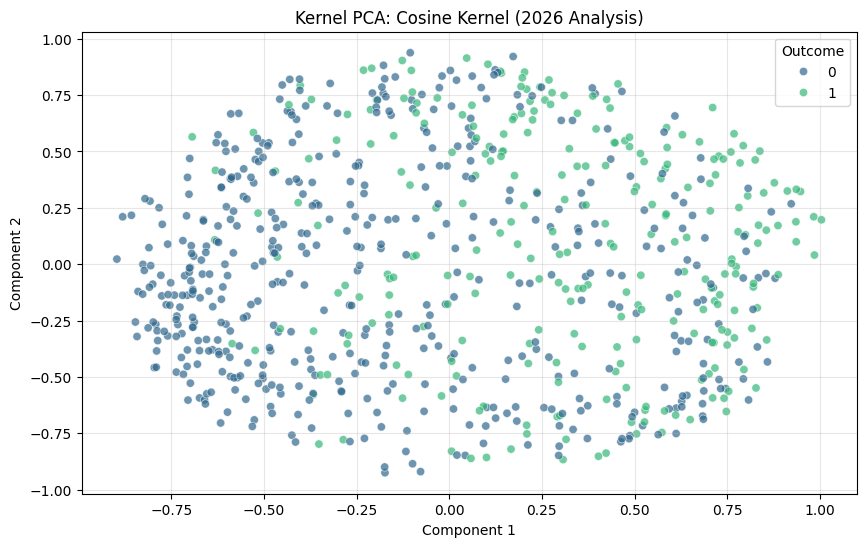

Kernel PCA (cosine) успешно выполнен.


In [ ]:
from sklearn.decomposition import KernelPCA

# применение Kernel PCA с ядром cosine
kpca_cosine = KernelPCA(n_components=2, kernel='cosine', random_state=42)
X_kpca_cosine = kpca_cosine.fit_transform(X_scaled)

# создание dataframe для визуализации
df_cosine = pd.DataFrame(data=X_kpca_cosine, columns=['Component 1', 'Component 2'])
df_cosine['Outcome'] = y.values

# визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='Outcome', data=df_cosine, palette='viridis', alpha=0.7)
plt.title('Kernel PCA: Cosine Kernel (2026 Analysis)')
plt.grid(True, alpha=0.3)
plt.show()

print("Kernel PCA (cosine) успешно выполнен.")

###  Ядерная функция `precomputed`

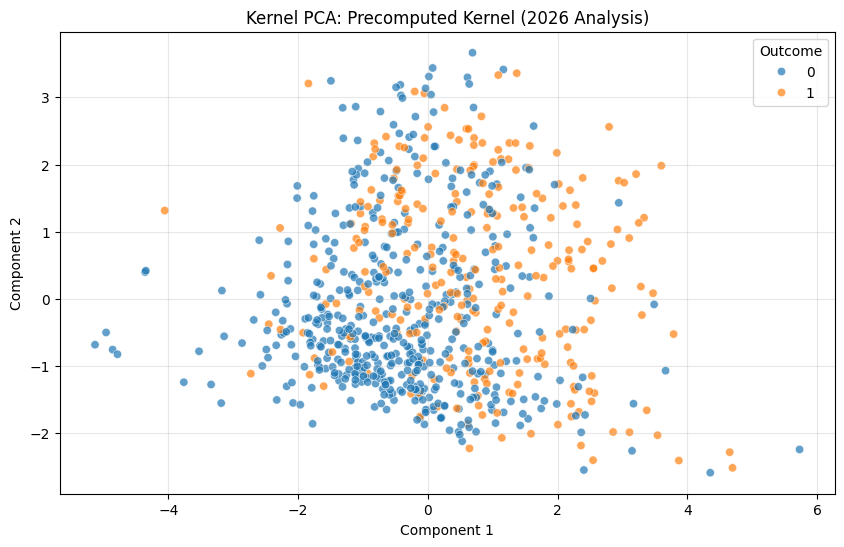

Форма входной матрицы для precomputed: (768, 768)
Kernel PCA (precomputed) успешно выполнен.


In [ ]:
from sklearn.decomposition import KernelPCA
import numpy as np

# вычисление ядерной матрицы (Kernel Matrix)
kernel_matrix = np.dot(X_scaled, X_scaled.T)

# применение Kernel PCA с параметром kernel='precomputed'
kpca_precomputed = KernelPCA(n_components=2, kernel='precomputed', random_state=42)
X_kpca_pre = kpca_precomputed.fit_transform(kernel_matrix)

# создание dataframe для визуализации
df_pre = pd.DataFrame(data=X_kpca_pre, columns=['Component 1', 'Component 2'])
df_pre['Outcome'] = y.values

# визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='Outcome', data=df_pre, palette='tab10', alpha=0.7)
plt.title('Kernel PCA: Precomputed Kernel (2026 Analysis)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Форма входной матрицы для precomputed: {kernel_matrix.shape}")
print("Kernel PCA (precomputed) успешно выполнен.")